In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import string

In [ ]:
df_fake = pd.read_csv("/content/drive/MyDrive/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/True.csv")
news=pd.read_csv("/content/drive/MyDrive/fake_or_real_news.csv")

In [ ]:
df_fake.shape,df_true.shape

((23481, 4), (21417, 4))

In [ ]:
df_fake.head(10)

,title,text,subject,date,labels
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",Fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",Fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",Fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",Fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",Fake


In [ ]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake["labels"] = "Fake"
df_true["labels"] = "Real"

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [ ]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape,df_true.shape

((23471, 5), (21407, 5))

In [ ]:
df_fake_manual_testing.head(10)

,title,text,subject,date,labels
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",Fake
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",Fake
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",Fake
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",Fake
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",Fake
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",Fake


In [ ]:
df_true_manual_testing.head(10)

,title,text,subject,date,labels
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",Real
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",Real
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",Real
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",Real
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",Real
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",Real
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",Real
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",Real
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",Real
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",Real


In [ ]:
new = pd.concat([df_fake, df_true], axis =0 )
new.head()
new.to_csv("new.csv")

In [ ]:
new.columns

Index(['title', 'text', 'subject', 'date', 'labels'], dtype='object')

Text(0.5, 1.0, 'Fake news')

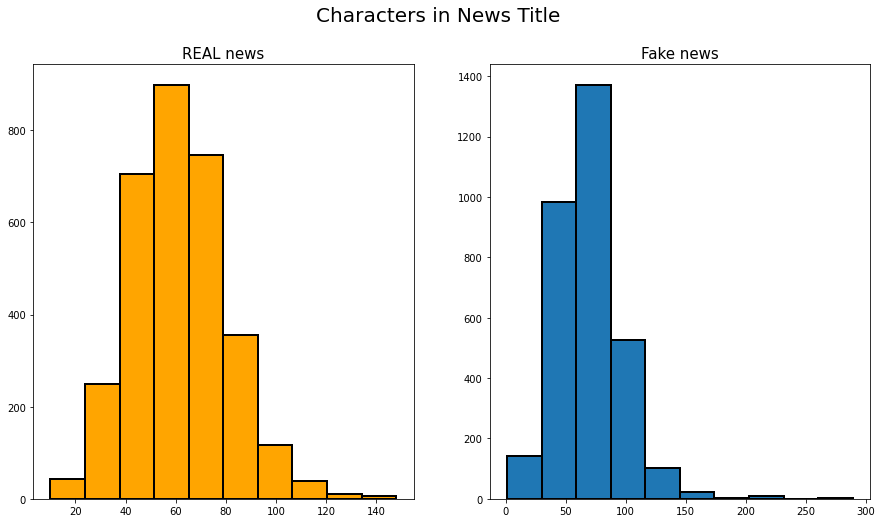

In [ ]:
fig, (x,y)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
news_len=news[news['label']=='REAL']['title'].str.len()
x.hist(news_len,color='orange',linewidth=2,edgecolor='black')
x.set_title('REAL news',fontsize=15)
news_len=news[news['label']=='FAKE']['title'].str.len()
y.hist(news_len,linewidth=2,edgecolor='black')
y.set_title('Fake news',fontsize=15)

Text(0.5, 1.0, 'Fake news')

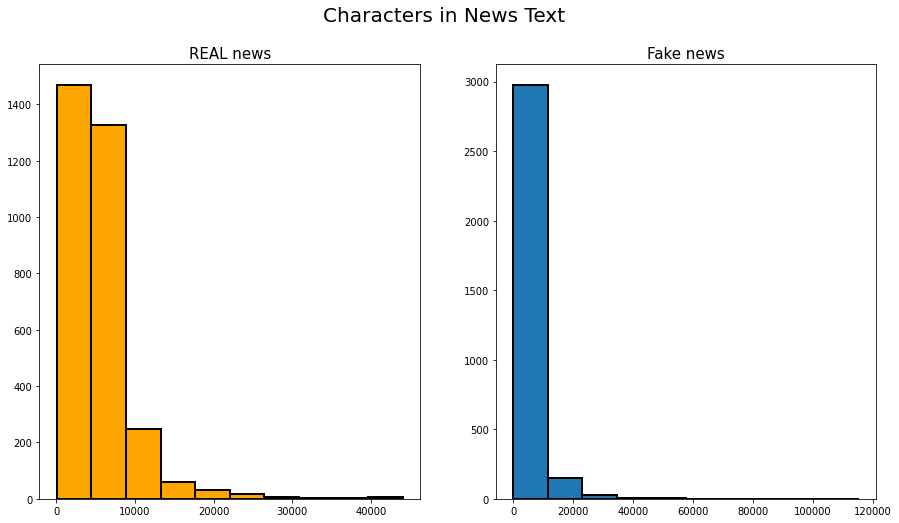

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Text',fontsize=20)
news_len=news[news['label']=='REAL']['text'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=news[news['label']=='FAKE']['text'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

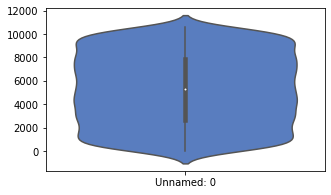

In [ ]:
ax, figure = plt.subplots(figsize = [5, 3])
sns.violinplot(news_len=news[news['label']=='REAL']['text'].str.len(), news_lenn=news[news['label']=='FAKE']['text'].str.len(), data = news, palette = "muted", split=True)

Text(0, 0.5, 'Text')

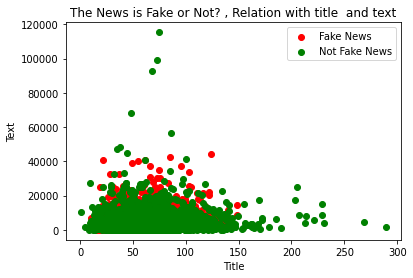

In [ ]:

plt.scatter(news[news['label']=='REAL']['title'].str.len()[news.label=='REAL'], news[news['label']=='REAL']['text'].str.len()[news.label=='REAL'], c="red")
plt.scatter(news[news['label']=='FAKE']['title'].str.len()[news.label=='FAKE'], news[news['label']=='FAKE']['text'].str.len()[news.label=='FAKE'], c="green")

plt.legend(["Fake News","Not Fake News"])
plt.title("The News is Fake or Not? , Relation with title  and text")
plt.xlabel("Title")
plt.ylabel("Text")

<Figure size 2160x2160 with 0 Axes>

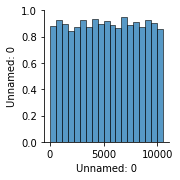

In [ ]:
plt.figure(figsize=(30,30))
sns.pairplot(news)
plt.show()

In [ ]:
df = new.drop(["title", "subject","date"], axis = 1)

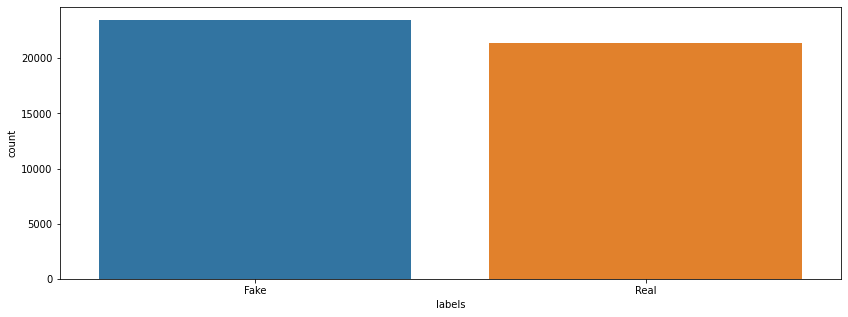

In [ ]:
fig, ax = plt.subplots(figsize=[14, 5])
sns.countplot(x = "labels", data = df)

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

,text,labels
5438,CAIRO (Reuters) - United Nations Secretary-Gen...,Real
22894,21st Century WireUS President Donald Trump has...,Fake
7983,"SACRAMENTO, Calif. (Reuters) - California Gove...",Real
17714,WASHINGTON (Reuters) - U.S. Secretary of State...,Real
6355,WASHINGTON (Reuters) - U.S. Republicans promis...,Real


In [ ]:
df.isnull().sum()

text      0
labels    0
dtype: int64

In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df.head()

,text,labels
0,CAIRO (Reuters) - United Nations Secretary-Gen...,Real
1,21st Century WireUS President Donald Trump has...,Fake
2,"SACRAMENTO, Calif. (Reuters) - California Gove...",Real
3,WASHINGTON (Reuters) - U.S. Secretary of State...,Real
4,WASHINGTON (Reuters) - U.S. Republicans promis...,Real


In [ ]:
df.columns

Index(['text', 'labels'], dtype='object')

In [ ]:
def correction(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
df["text"] = df["text"].apply(correction)

In [ ]:
df.head()

,text,labels
0,cairo reuters united nations secretary gen...,Real
1,century wireus president donald trump has acc...,Fake
2,sacramento calif reuters california gove...,Real
3,washington reuters u s secretary of state...,Real
4,washington reuters u s republicans promis...,Real


In [ ]:
x = df["text"]
y = df["labels"]

In [ ]:
x


0        cairo  reuters    united nations secretary gen...
1         century wireus president donald trump has acc...
2        sacramento  calif   reuters    california gove...
3        washington  reuters    u s  secretary of state...
4        washington  reuters    u s  republicans promis...
                               ...                        
44873    the daily show thought it was appropriate in t...
44874    beijing  reuters    china has  reasonably  exp...
44875    washington  reuters    kara novaco brockmeyer ...
44876    sydney  reuters    australian police said on f...
44877    her name is m h  weibe and she s here to rap a...
Name: text, Length: 44878, dtype: object

In [ ]:
y

0        Real
1        Fake
2        Real
3        Real
4        Real
         ... 
44873    Fake
44874    Real
44875    Real
44876    Real
44877    Fake
Name: labels, Length: 44878, dtype: object

**Splitting Training and Testing**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

**Convert text to vectors**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k =3
knn = KNeighborsClassifier(n_neighbors = k).fit(xv_train,y_train)
yhat = knn.predict(xv_test)

In [ ]:
knn = knn.score(xv_train, y_train)


In [ ]:
print("accuracy score :" ,knn*100)
print("knn accuracy - testing  : ", (metrics.accuracy_score(y_test, yhat))*100)

accuracy score : 80.5989660704736
knn accuracy - testing  :  71.88057040998217


In [263]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)
LogisticRegression()

LogisticRegression()

In [264]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [265]:
pred_lr=LR.predict(xv_test)


In [266]:
LR.score(xv_test, y_test)*100

98.80570409982174